# Header

* set up the Python environment and load some helper functions

In [1]:
import math
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import missingno as msno
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import pickle
from collections import Counter

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.1f}'.format


%matplotlib inline

/Users/scheckley/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/scheckley/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/scheckley/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## task 1 - data analysis

## Data import and cleaning

In [2]:
data = pd.read_csv('./data.csv',encoding='ISO-8859-1')

In [3]:
data.shape

(541909, 8)

The data consists of 8 columns and 541909 rows.

In [4]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.5,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.4,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.8,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.4,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.4,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.7,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.2,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.9,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.9,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.7,13047.0,United Kingdom


A cursory check for missing data:

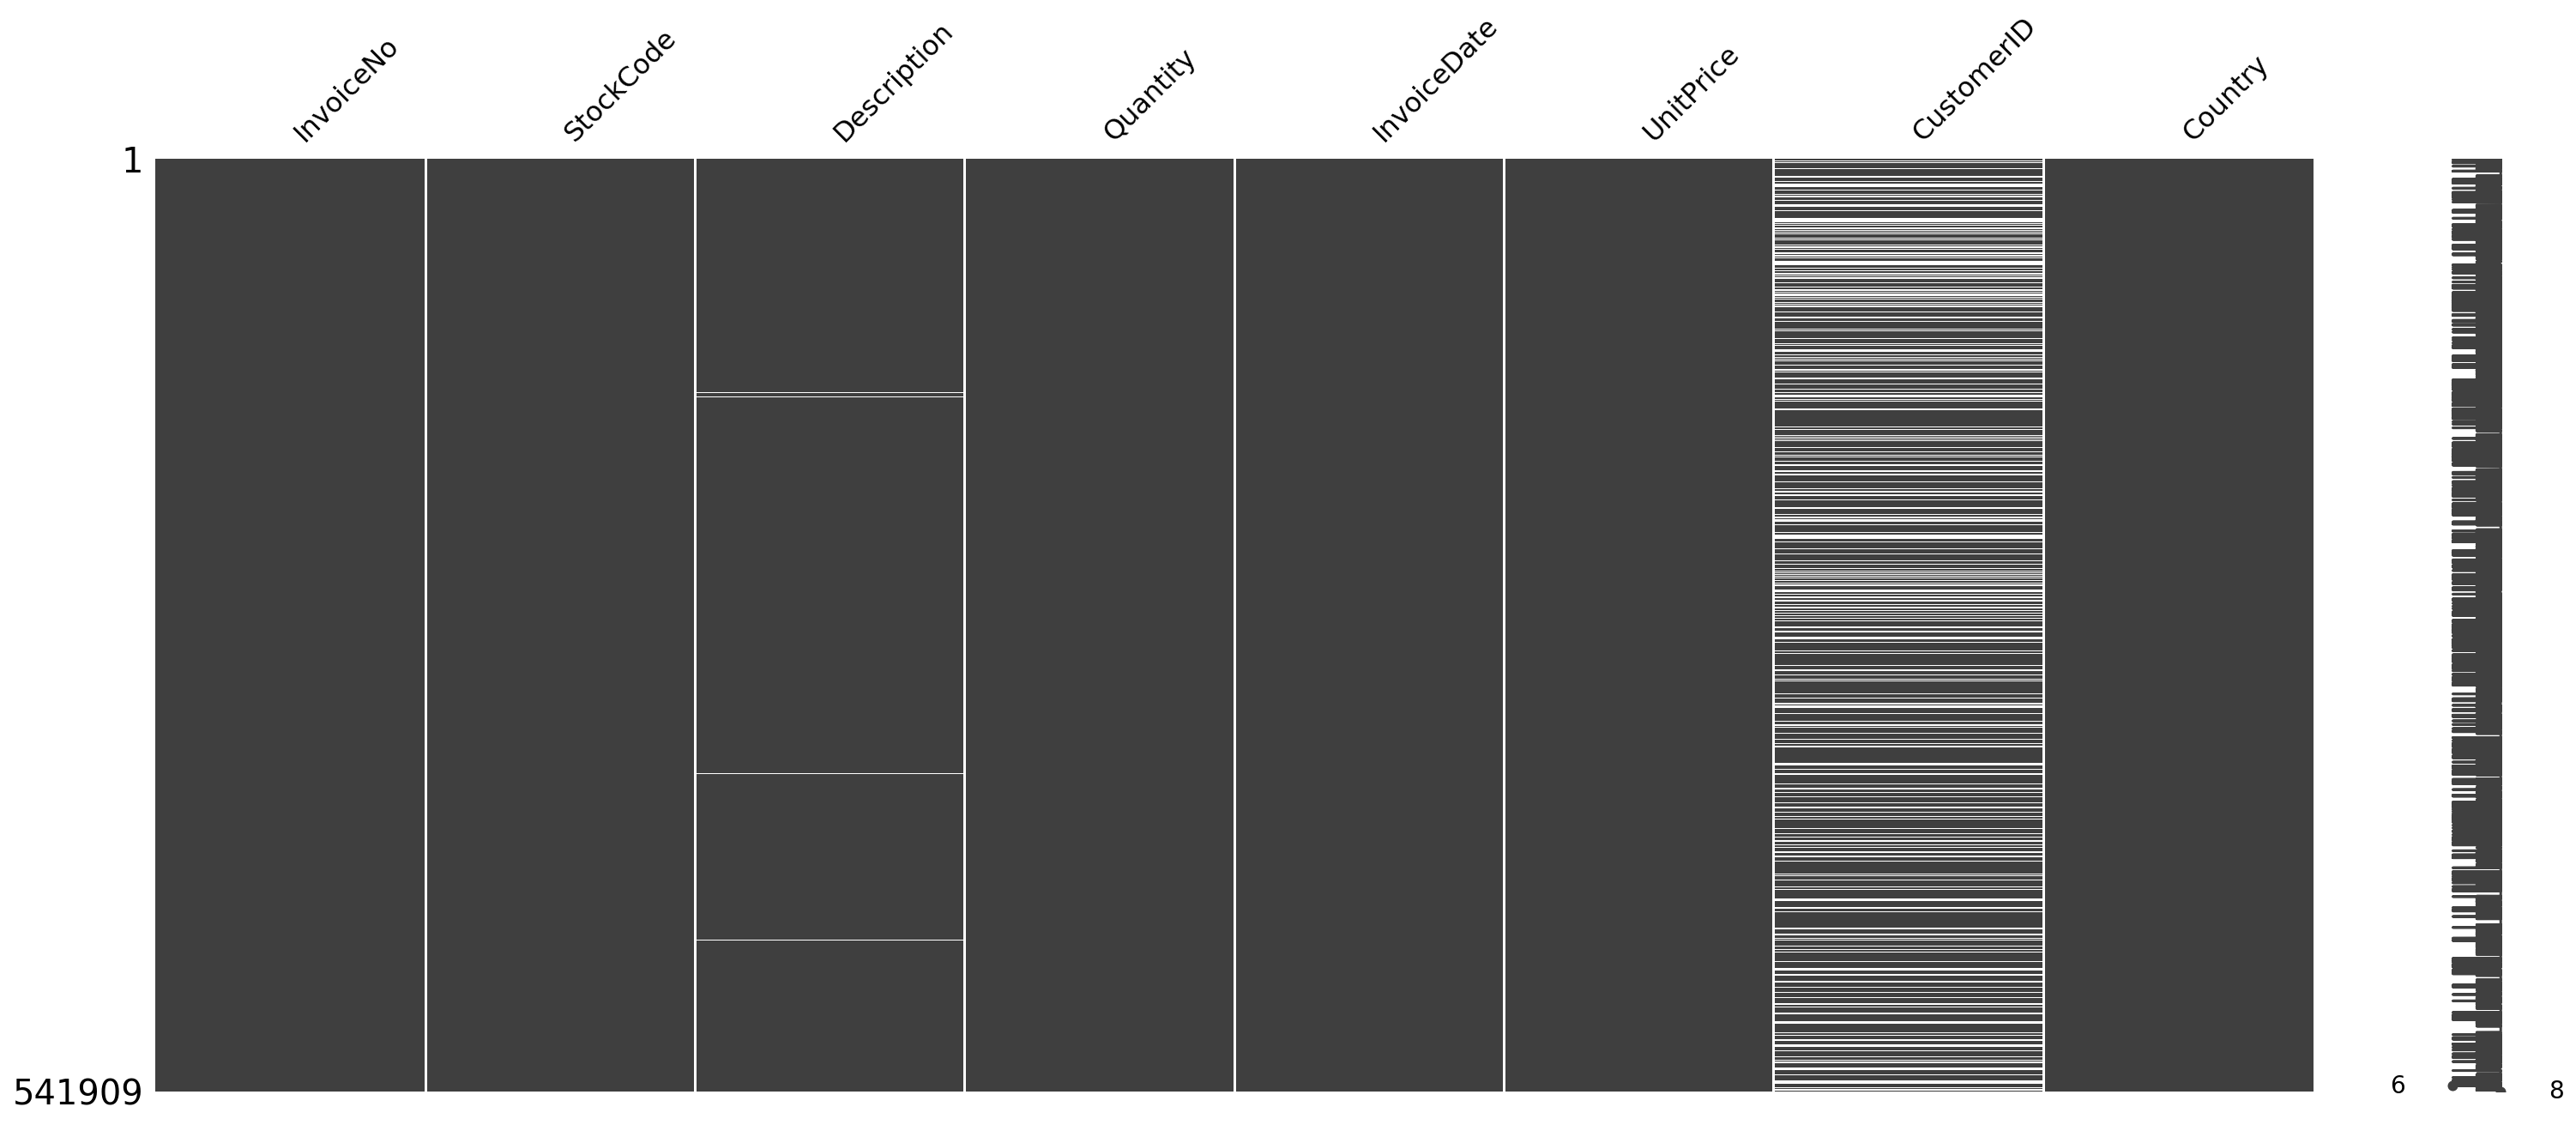

In [5]:
msno.matrix(data);

The dataset is missing some Description and customer ID data entries.

In [6]:
null_data = data[data.isnull().any(axis=1)]
null_data.shape

(135080, 8)

In [7]:
null_data_frac = null_data.shape[0]/data.shape[0]*100
null_data_frac

24.926694334288598

25% of the data contains missing values, which the figure above indicates is mostly nan values in CustomerID

## Exploratory data analysis

In [8]:
data = data.sort_values('Quantity', ascending=False)
data.head(11)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.1,16446.0,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.0,12346.0,United Kingdom
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,11/25/2011 15:57,0.0,13256.0,United Kingdom
74614,542504,37413,NaN,5568,1/28/2011 12:03,0.0,nan,United Kingdom
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,10/27/2011 12:26,0.2,12901.0,United Kingdom
206121,554868,22197,SMALL POPCORN HOLDER,4300,5/27/2011 10:52,0.7,13135.0,United Kingdom
220843,556231,85123A,?,4000,6/9/2011 15:04,0.0,nan,United Kingdom
97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,2/22/2011 10:43,0.8,18087.0,United Kingdom
270885,560599,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,7/19/2011 17:04,0.1,14609.0,United Kingdom
160546,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,4/18/2011 13:20,2.1,15749.0,United Kingdom


The top 10 most popular items are sold in/to the UK. Apparently paper craft little birdie is very popular, along with medium ceramic top storage jar. I will remove the items with 'NaN' descriptor. These entries associated with nan CustomerID entries and 131 lower case descriptions which describe problems with the orders and no details of the item ordered. In addition, the data for United Kingdom contains negative values associated with negative UnitPrice values. There are also InvoiceNo entries beginning with the character C which are associated with negative UnitPrice and nan entries. Removing the rows containing NaN values therefore cleans several issues that complicate this analysis in the absence of the data owner.

In [26]:
data = data.dropna()

In [27]:
data.shape # 541909 - 406829 = dropped 135,080 entries

(406829, 8)

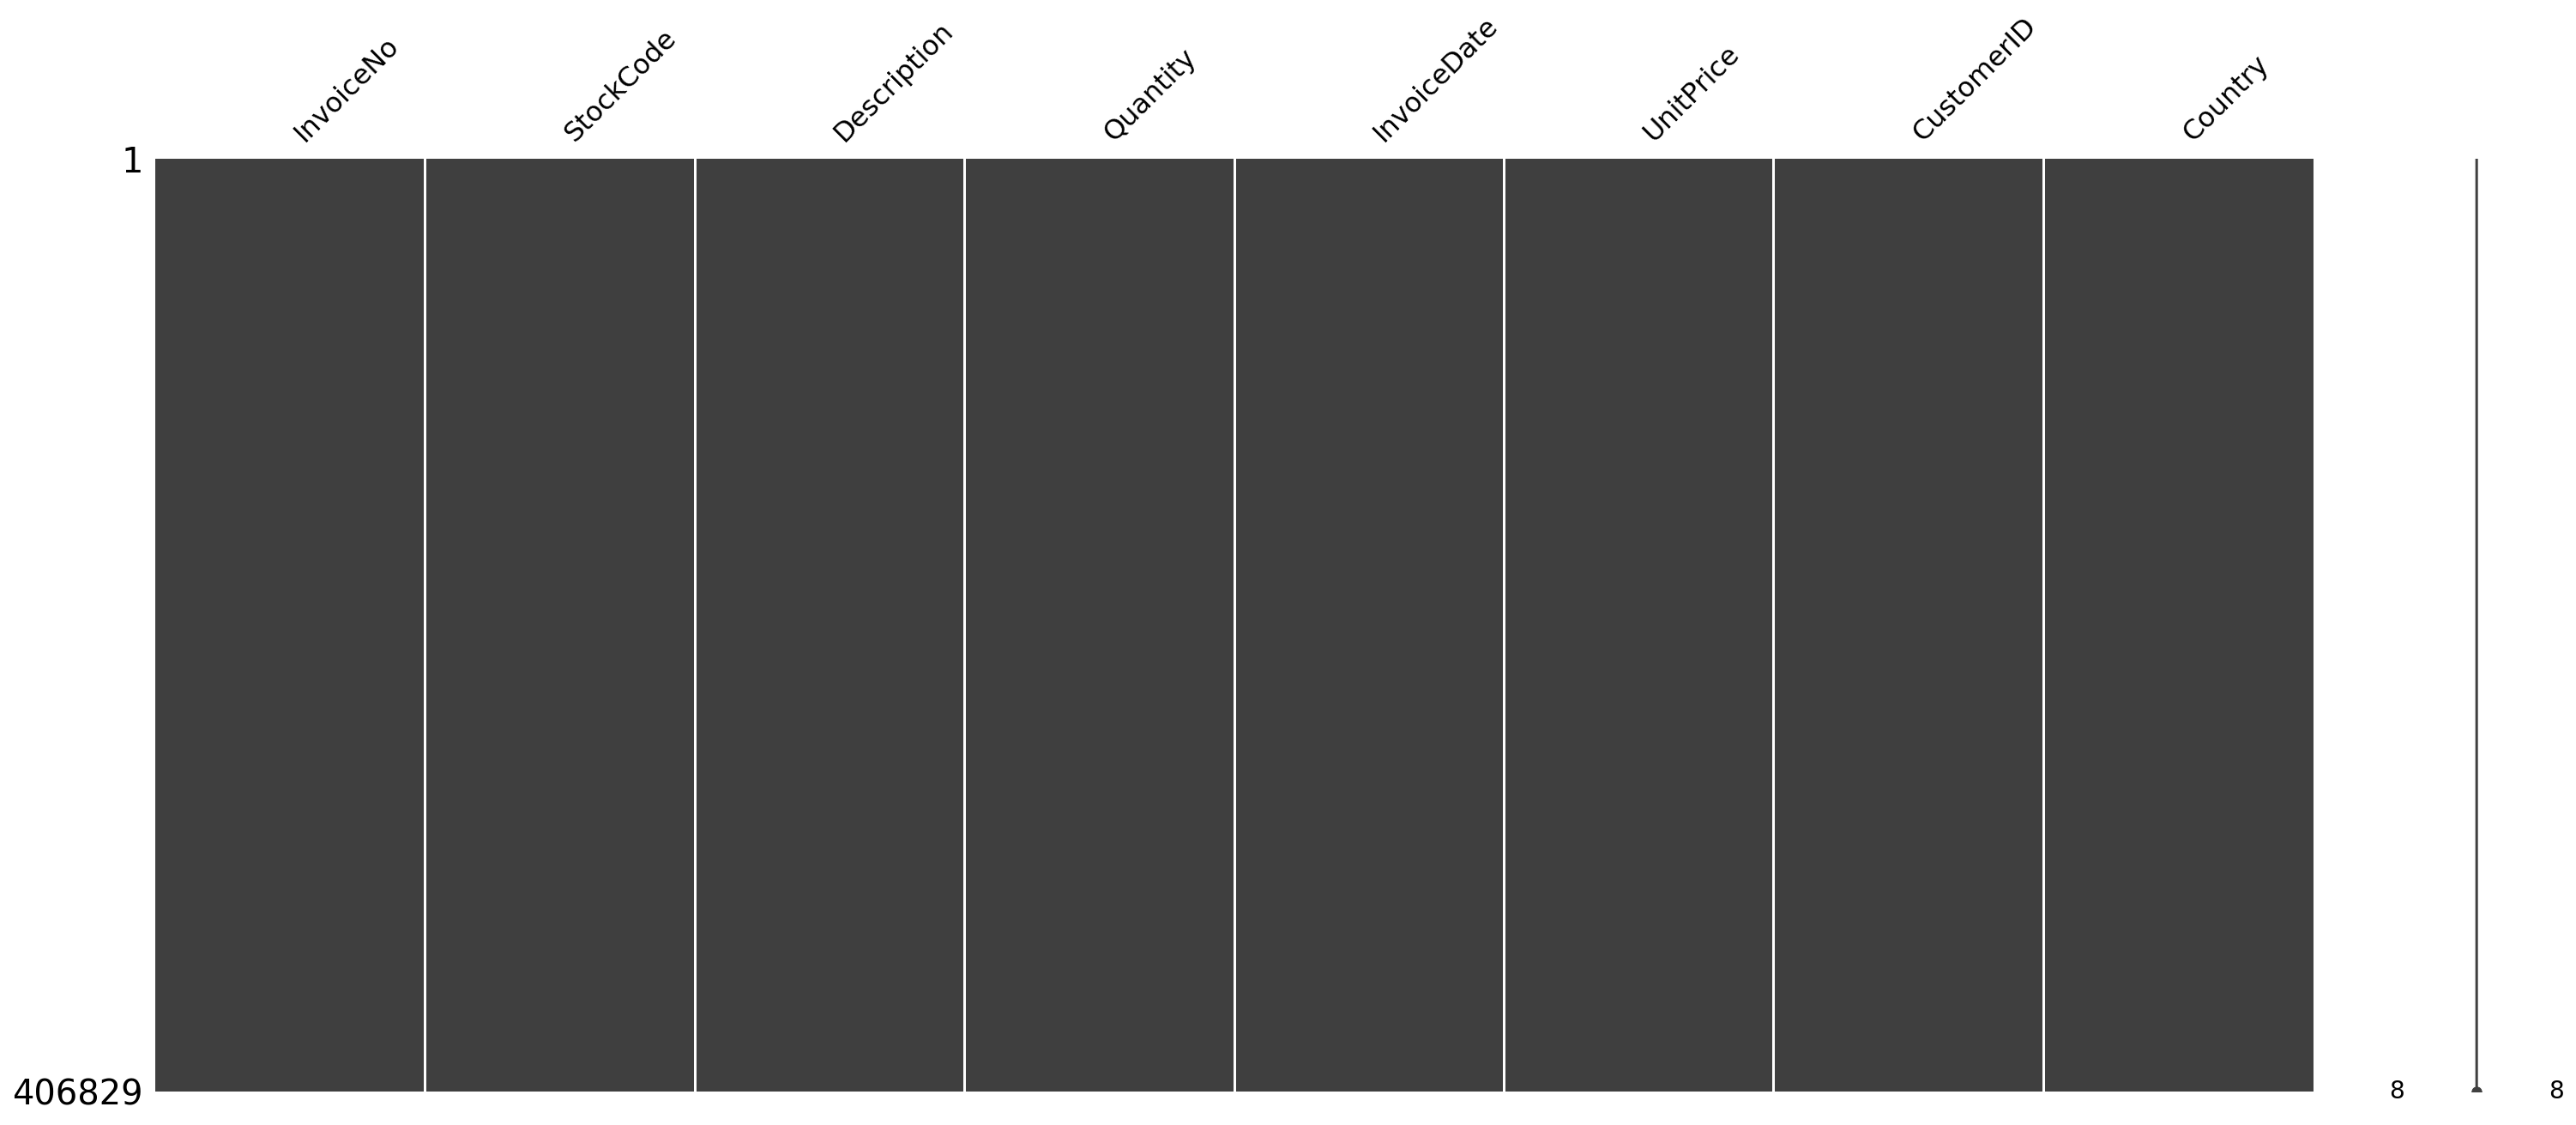

In [31]:
msno.matrix(data);

We now have no missing values and have removed assumed erroneous results.

### Further exploration

How many unique descriptors are there in "Descriptions"?

In [28]:
# general clean up of Description column to remove any heading or trailing white space
data['Description'] = data['Description'].str.strip()
descriptors = pd.unique(data['Description'].values.ravel()).tolist()
print('There are',len(descriptors), 'unique descriptors in the Descriptions column.')

There are 3885 unique descriptors in the Descriptions column.


In [29]:
descriptors2 = []
for i in range(0,len(descriptors),1):
    text = str(descriptors[i])
    if text == text.upper():
        descriptors2.append(text)
        
print('There are', len(descriptors2), 'all caps descriptors.')

There are 3862 all caps descriptors.


In [13]:
descriptors2

['PAPER CRAFT , LITTLE BIRDIE',
 'MEDIUM CERAMIC TOP STORAGE JAR',
 'ASSTD DESIGN 3D PAPER STICKERS',
 'WORLD WAR 2 GLIDERS ASSTD DESIGNS',
 'SMALL POPCORN HOLDER',
 'EMPIRE DESIGN ROSETTE',
 'FAIRY CAKE FLANNEL ASSORTED COLOUR',
 'SMALL CHINESE STYLE SCISSOR',
 'ASSORTED COLOUR BIRD ORNAMENT',
 'PACK OF 60 PINK PAISLEY CAKE CASES',
 'GROW A FLYTRAP OR SUNFLOWER IN TIN',
 'RABBIT NIGHT LIGHT',
 'PACK OF 12 SKULL TISSUES',
 'RED  HARMONICA IN BOX',
 'GIN + TONIC DIET METAL SIGN',
 'POPCORN HOLDER',
 'PINK VINTAGE SPOT BEAKER',
 'GREEN VINTAGE SPOT BEAKER',
 'WHITE HANGING HEART T-LIGHT HOLDER',
 'BLUE VINTAGE SPOT BEAKER',
 'ASSORTED COLOUR T-LIGHT HOLDER',
 'RAIN PONCHO RETROSPOT',
 'GINGHAM HEART DECORATION',
 'ASSORTED LAQUERED INCENSE HOLDERS',
 'LETTER SHAPE PENCIL SHARPENER',
 'HERB MARKER BASIL',
 'VINTAGE DOILY JUMBO BAG RED',
 'ROUND SNACK BOXES SET OF 4 FRUITS',
 'GIRLS ALPHABET IRON ON PATCHES',
 'ASSORTED INCENSE PACK',
 'PACK OF 72 RETROSPOT CAKE CASES',
 '72 SWEETHEART FAI

In [14]:
# from inspection of the baskets below I identified 3 problem descriptors that need to be followed up.
additional_problem_list = ['damages/credits from ASOS.','incorrectly credited C550456 see 47', 'mystery! Only ever imported 1800']

In [15]:
# remove additional erroneous rows
data = data[~data['Description'].isin(additional_problem_list)]

In [16]:
data.shape

(406829, 8)

In [17]:
InvoiceNo = pd.unique(data['InvoiceNo'].values.ravel()).tolist()
print('There are', len(InvoiceNo), 'unique invoice numbers in the dataset.')

There are 22190 unique invoice numbers in the dataset.


#### Group my country

In [18]:
by_country = data.groupby('Country')
by_country.describe()

CustomerID                                         \
                          count    mean    std     min     25%     50%   
Country                                                                  
Australia                1259.0 12464.7  437.9 12386.0 12415.0 12415.0   
Austria                   401.0 12521.5  216.5 12358.0 12360.0 12374.0   
Bahrain                    17.0 12354.5    0.9 12353.0 12355.0 12355.0   
Belgium                  2069.0 12430.3  110.0 12361.0 12383.0 12407.0   
Brazil                     32.0 12769.0    0.0 12769.0 12769.0 12769.0   
Canada                    151.0 17321.1  521.5 15388.0 17444.0 17444.0   
Channel Islands           758.0 14888.2  142.7 14442.0 14930.0 14936.0   
Cyprus                    622.0 12405.0  198.9 12359.0 12359.0 12370.0   
Czech Republic             30.0 12781.0    0.0 12781.0 12781.0 12781.0   
Denmark                   389.0 12536.6  421.9 12367.0 12406.0 12412.0   
EIRE                     7485.0 14748.4  314.7 14016.0 14911.0 14911.0   
European Community         61.0 15108.0    0.0 15108.0 15108.0 15108.0   
Finland                   695.0 12517.0  122.4 12348.0 12428.0 12428.0   
France                   8491.0 12678.0  276.7 12413.0 12571.0 12674.0   
Germany                  9495.0 12646.1  309.1 12426.0 12480.0 12592.0   
Greece                    146.0 13757.4 1749.6 12478.0 12717.0 12717.0   
Iceland                   182.0 12347.0    0.0 12347.0 12347.0 12347.0   
Israel                    250.0 12657.9   59.4 12512.0 12653.0 12688.0   
Italy                     803.0 12648.4  437.4 12349.0 12578.0 12584.0   
Japan                     358.0 12757.8   13.6 12753.0 12753.0 12753.0   
Lebanon                    45.0 12764.0    0.0 12764.0 12764.0 12764.0   
Lithuania                  35.0 15332.0    0.0 15332.0 15332.0 15332.0   
Malta                     127.0 16996.0 1127.5 15480.0 15480.0 17828.0   
Netherlands              2371.0 14420.3  609.5 12759.0 14646.0 14646.0   
Norway                   1086.0 12438.0   76.7 12350.0 12432.0 12433.0   
Poland                    341.0 12733.1   94.9 12576.0 12576.0 12779.0   
Portugal                 1480.0 12746.5   97.0 12356.0 12757.0 12766.0   
RSA                        58.0 12446.0    0.0 12446.0 12446.0 12446.0   
Saudi Arabia               10.0 12565.0    0.0 12565.0 12565.0 12565.0   
Singapore                 229.0 12744.0    0.0 12744.0 12744.0 12744.0   
Spain                    2533.0 12905.4 1271.2 12354.0 12484.0 12540.0   
Sweden                    462.0 14697.1 2379.0 12483.0 12638.0 12697.0   
Switzerland              1877.0 12667.0  460.8 12357.0 12378.0 12451.0   
USA                       291.0 12618.9   38.5 12558.0 12607.0 12607.0   
United Arab Emirates       68.0 14984.6 2546.1 12739.0 12739.0 12739.0   
United Kingdom         361878.0 15547.9 1594.4 12346.0 14194.0 15514.0   
Unspecified               244.0 13721.5 1515.4 12363.0 12743.0 12743.0   

                                     Quantity                                 \
                         75%     max    count mean   std      min   25%  50%   
Country                                                                        
Australia            12415.0 16321.0   1259.0 66.4  97.7   -120.0   6.0 24.0   
Austria              12818.0 12865.0    401.0 12.0  21.7    -48.0   6.0  9.0   
Bahrain              12355.0 12355.0     17.0 15.3  25.0      2.0   6.0  6.0   
Belgium              12431.0 12876.0   2069.0 11.2  13.6    -12.0   4.0 10.0   
Brazil               12769.0 12769.0     32.0 11.1   8.5      2.0   3.0 10.0   
Canada               17444.0 17844.0    151.0 18.3  46.7      1.0   6.0 12.0   
Channel Islands      14936.0 14937.0    758.0 12.5  22.6     -2.0   4.0 10.0   
Cyprus               12391.0 13809.0    622.0 10.2  23.3    -33.0   2.0  5.0   
Czech Republic       12781.0 12781.0     30.0 19.7  22.8    -24.0  12.0 24.0   
Denmark              12429.0 13919.0    389.0 21.0  27.4    -25.0  12.0 12.0   
EIRE                

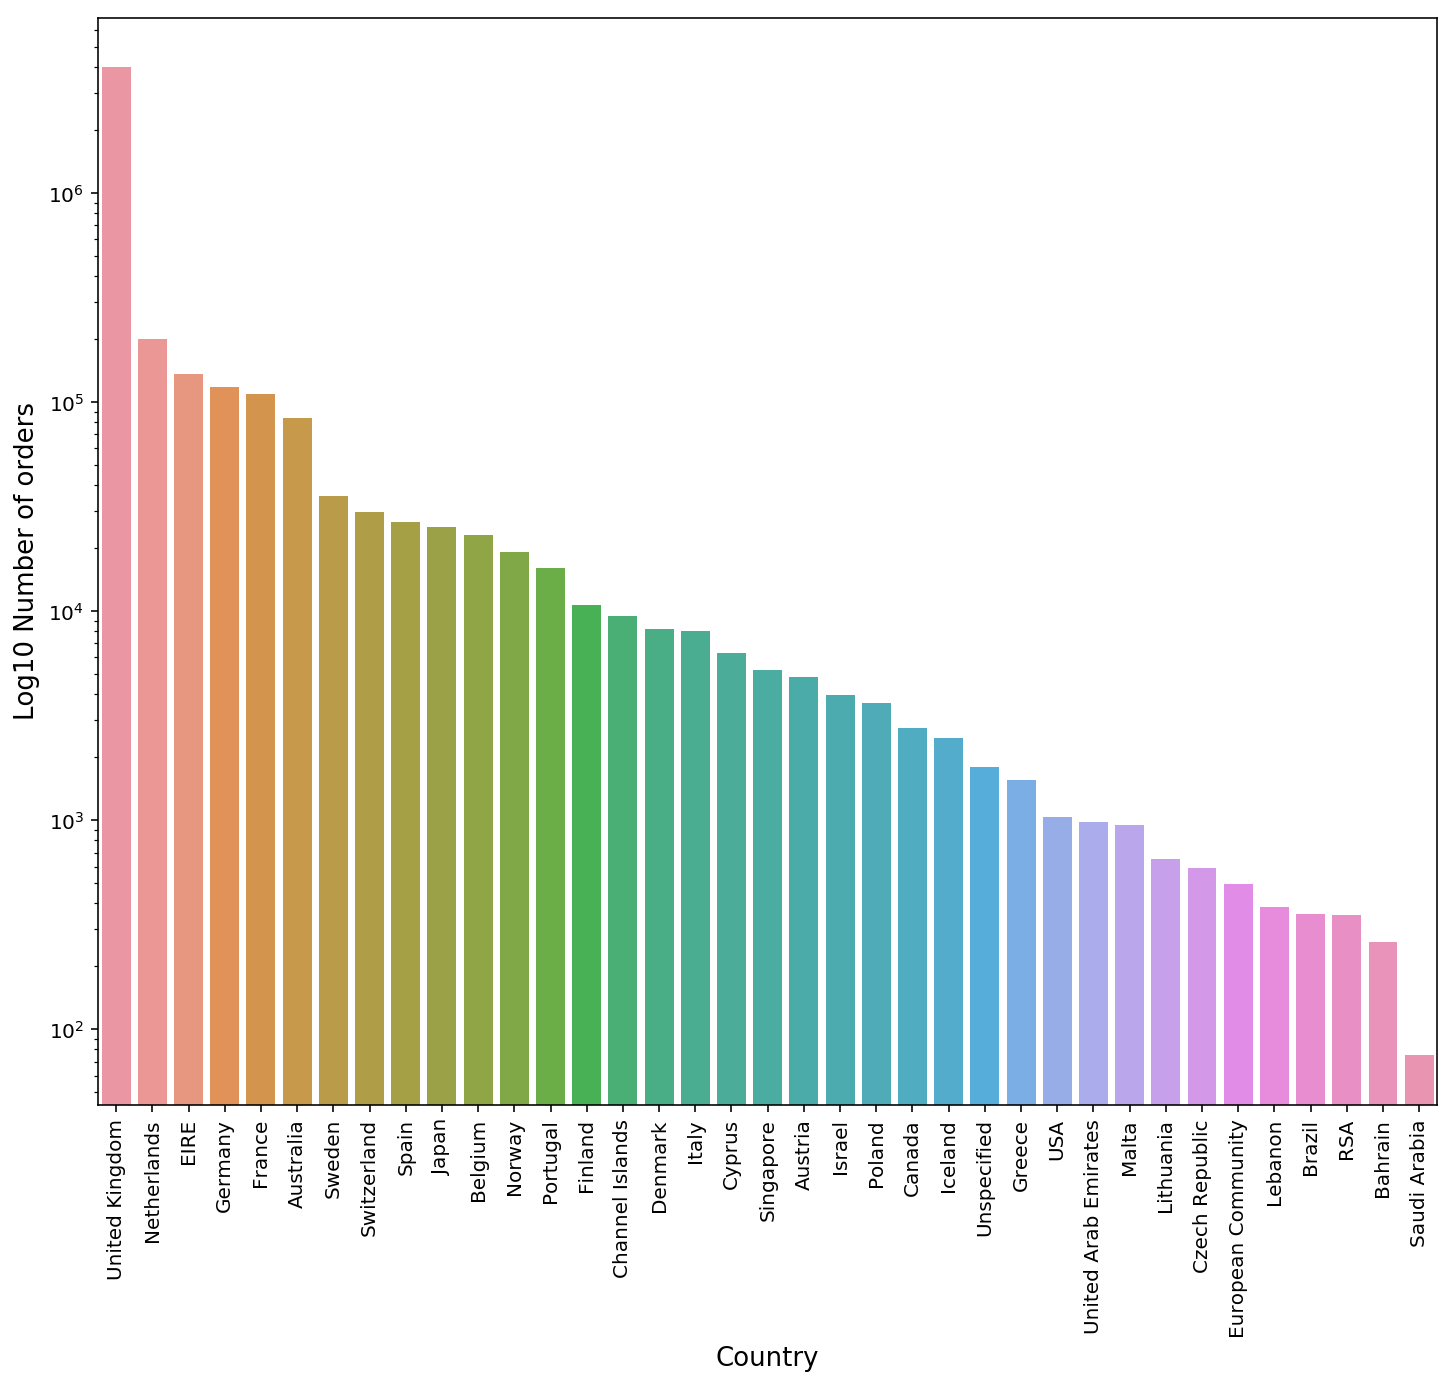

In [42]:
grouped  = data.groupby(['Country']).sum()['Quantity'].sort_values(ascending=False)

f, ax = plt.subplots(figsize=(12, 10))
plt.xticks(rotation='vertical')
sns.barplot(grouped.index, grouped.values)
f.get_axes()[0].set_yscale('log') #I'm using a log scale just for visualisation as the UK dominates the market
plt.ylabel('Log10 Number of orders', fontsize=13)
plt.xlabel('Country', fontsize=13)
plt.show()

The United Kingdom purchases the majority of products by almost 2 orders of magnitude.

### Generate a basket for each country

In [69]:
basket = (data[data['Country'] == "France"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0).set_index('InvoiceNo'))

In [70]:
basket.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,15CM CHRISTMAS GLASS BALL 20 LIGHTS,16 PIECE CUTLERY SET PANTRY DESIGN,18PC WOODEN CUTLERY SET DISPOSABLE,20 DOLLY PEGS RETROSPOT,200 RED + WHITE BENDY STRAWS,3 HOOK HANGER MAGIC GARDEN,3 PIECE SPACEBOY COOKIE CUTTER SET,3 RAFFIA RIBBONS 50'S CHRISTMAS,3 STRIPEY MICE FELTCRAFT,3 TIER CAKE TIN RED AND CREAM,3 TRADITIONAl BISCUIT CUTTERS SET,36 DOILIES DOLLY GIRL,36 DOILIES VINTAGE CHRISTMAS,36 FOIL HEART CAKE CASES,36 FOIL STAR CAKE CASES,36 PENCILS TUBE RED RETROSPOT,36 PENCILS TUBE SKULLS,36 PENCILS TUBE WOODLAND,3D HEARTS HONEYCOMB PAPER GARLAND,3D TRADITIONAL CHRISTMAS STICKERS,3D VINTAGE CHRISTMAS STICKERS,4 IVORY DINNER CANDLES SILVER FLOCK,4 PINK DINNER CANDLE SILVER FLOCK,4 TRADITIONAL SPINNING TOPS,5 HOOK HANGER MAGIC TOADSTOOL,5 HOOK HANGER RED MAGIC TOADSTOOL,50'S CHRISTMAS GIFT BAG LARGE,6 GIFT TAGS 50'S CHRISTMAS,6 GIFT TAGS VINTAGE CHRISTMAS,6 RIBBONS EMPIRE,6 RIBBONS RUSTIC CHARM,6 ROCKET BALLOONS,60 CAKE CASES DOLLY GIRL DESIGN,60 CAKE CASES VINTAGE CHRISTMAS,60 TEATIME FAIRY CAKE CASES,6PC WOOD PLATE SET DISPOSABLE,72 SWEETHEART FAIRY CAKE CASES,A PRETTY THANK YOU CARD,ABC TREASURE BOOK BOX,ADULT APRON APPLE DELIGHT,...,WOODEN REGATTA BUNTING,WOODEN ROUNDERS GARDEN SET,WOODEN SCHOOL COLOURING SET,WOODEN SKITTLES GARDEN SET,WOODEN STAR CHRISTMAS SCANDINAVIAN,WOODEN TREE CHRISTMAS SCANDINAVIAN,WOODEN UNION JACK BUNTING,WOODLAND HEIGHT CHART STICKERS,WOODLAND STICKERS,WOODLAND BUNNIES LOLLY MAKERS,WOODLAND CHARLOTTE BAG,WOODLAND DESIGN COTTON TOTE BAG,WOODLAND LARGE BLUE FELT HEART,WOODLAND LARGE PINK FELT HEART,WOODLAND LARGE RED FELT HEART,WOODLAND MINI BACKPACK,WOODLAND PARTY BAG + STICKER SET,WOODLAND SMALL BLUE FELT HEART,WOODLAND SMALL PINK FELT HEART,WOODLAND SMALL RED FELT HEART,WOODLAND STORAGE BOX LARGE,WOODLAND STORAGE BOX SMALL,WORLD WAR 2 GLIDERS ASSTD DESIGNS,WRAP VINTAGE DOILY,WRAP 50'S CHRISTMAS,WRAP ALPHABET DESIGN,WRAP CAROUSEL,WRAP CHRISTMAS VILLAGE,WRAP CIRCUS PARADE,WRAP DOILEY DESIGN,WRAP DOLLY GIRL,WRAP ENGLISH ROSE,WRAP GINGHAM ROSE,WRAP GREEN PEARS,WRAP I LOVE LONDON,WRAP PAISLEY PARK,WRAP PINK FAIRY CAKES,WRAP POPPIES DESIGN,WRAP RED APPLES,WRAP RED VINTAGE DOILY,WRAP SUKI AND FRIENDS,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [76]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)

In [77]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [78]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)

In [85]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN SPACEBOY),0.1,0.1,0.1,0.5,4.6,0.1,1.9
1,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN CIRCUS PARADE),0.1,0.1,0.1,0.7,4.6,0.1,2.5
2,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN CIRCUS PARADE),0.1,0.1,0.1,0.6,4.1,0.1,2.1
3,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN WOODLAND ANIMALS),0.1,0.1,0.1,0.6,4.1,0.1,2.2
4,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN SPACEBOY),0.1,0.1,0.1,0.6,5.3,0.1,2.3
5,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.1,0.1,0.1,0.8,5.3,0.1,3.8
6,(SET/20 RED RETROSPOT PAPER NAPKINS),(SET/6 RED SPOTTY PAPER CUPS),0.1,0.1,0.1,0.8,6.5,0.1,3.8
7,(SET/6 RED SPOTTY PAPER CUPS),(SET/20 RED RETROSPOT PAPER NAPKINS),0.1,0.1,0.1,0.7,6.5,0.1,3.4
8,(SET/6 RED SPOTTY PAPER PLATES),(SET/20 RED RETROSPOT PAPER NAPKINS),0.1,0.1,0.1,0.8,7.0,0.1,4.4
9,(SET/20 RED RETROSPOT PAPER NAPKINS),(SET/6 RED SPOTTY PAPER PLATES),0.1,0.1,0.1,0.8,7.0,0.1,3.9
